In [1]:
import pandas as pd
import os

# Ruta de la carpeta donde están los archivos .txt
carpeta = r'C:\Users\Pheno\Documents\database_almondcv2\BACKUPS\RESUMEN'

# Crear una lista para almacenar los DataFrames individuales
dataframes = []

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.txt'):
        # Determinar el año basado en el nombre del archivo
        if '2022' in archivo:
            year = 2022
        elif '2023' in archivo:
            year = 2023
        else:
            continue  # Si no contiene 2022 o 2023, omitir el archivo

        # Leer el archivo .txt en un DataFrame
        filepath = os.path.join(carpeta, archivo)
        df = pd.read_csv(filepath, sep='\t', header=0)  # Ajusta el separador y el header según sea necesario

        # Añadir la columna Year
        df['Year'] = year

        # Agregar el DataFrame a la lista
        dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_combinado = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame combinado
print(df_combinado)

# Opcional: guardar el DataFrame combinado en un archivo
# df_combinado.to_csv('archivo_combinado.csv', index=False)


                               Project_name  \
0              Seed_2022_10122024_watershed   
1              Seed_2022_10122024_watershed   
2              Seed_2022_10122024_watershed   
3              Seed_2022_10122024_watershed   
4              Seed_2022_10122024_watershed   
...                                     ...   
45960  Shell_2023_10122024_watershed_parte2   
45961  Shell_2023_10122024_watershed_parte2   
45962  Shell_2023_10122024_watershed_parte2   
45963  Shell_2023_10122024_watershed_parte2   
45964  Shell_2023_10122024_watershed_parte2   

                                          Sample_picture    Fruit_name  \
0                                   CL_10_11_F-003_1.png   Seed_almond   
1                                   CL_10_11_F-003_1.png   Seed_almond   
2                                   CL_10_11_F-003_1.png   Seed_almond   
3                                   CL_10_11_F-003_1.png   Seed_almond   
4                                   CL_10_11_F-003_1.png   Seed_a

In [ ]:
df_combinado

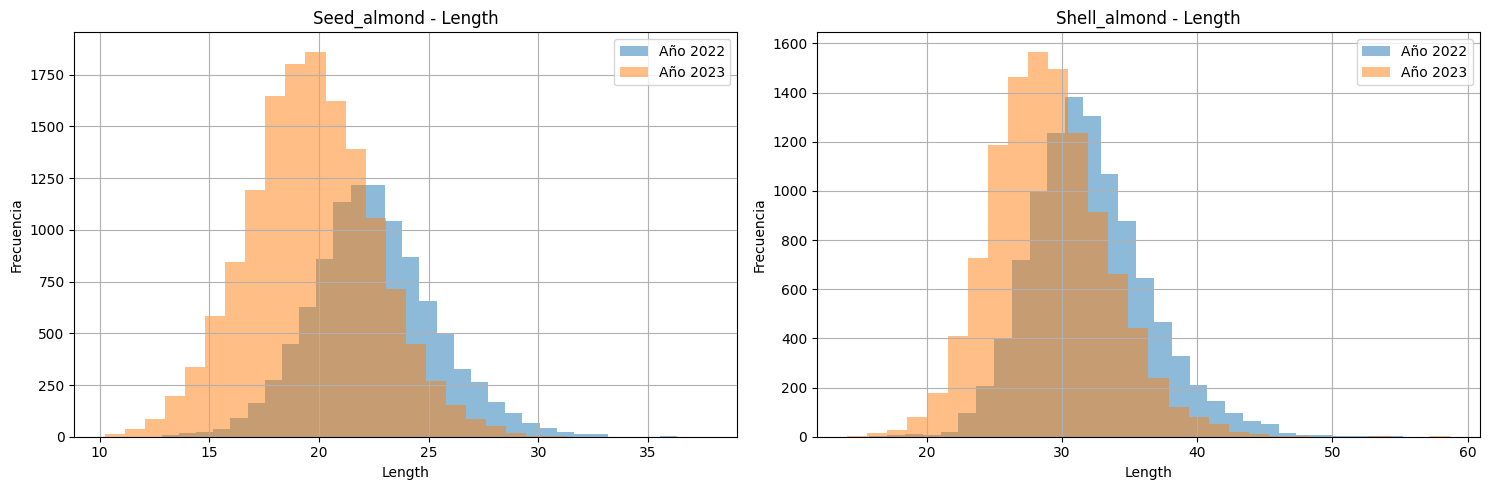

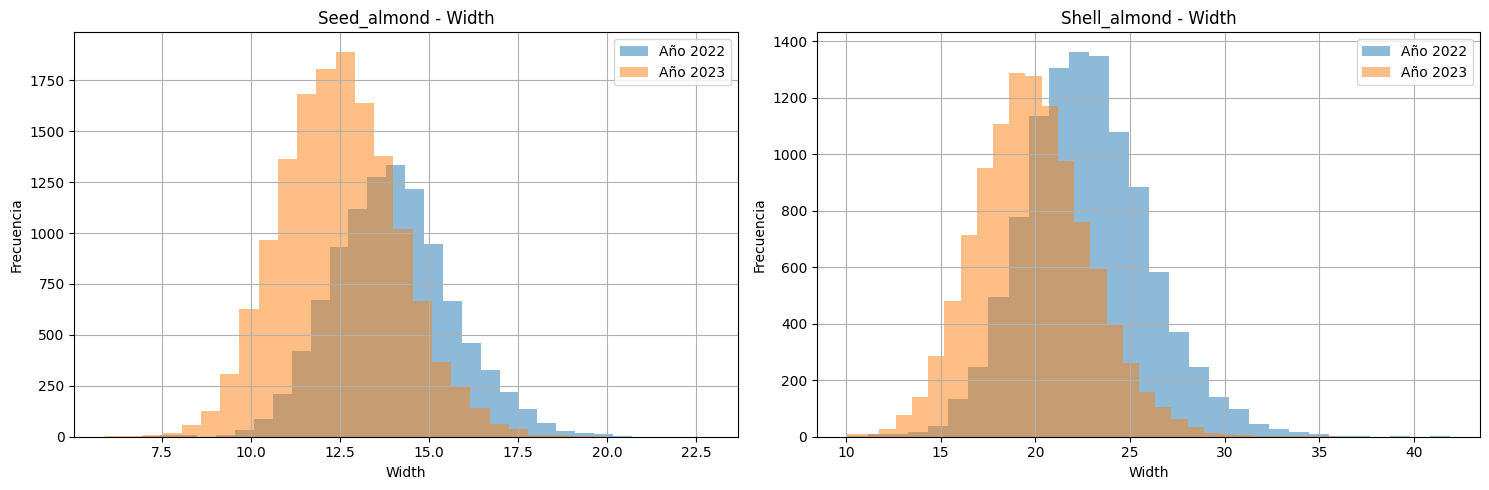

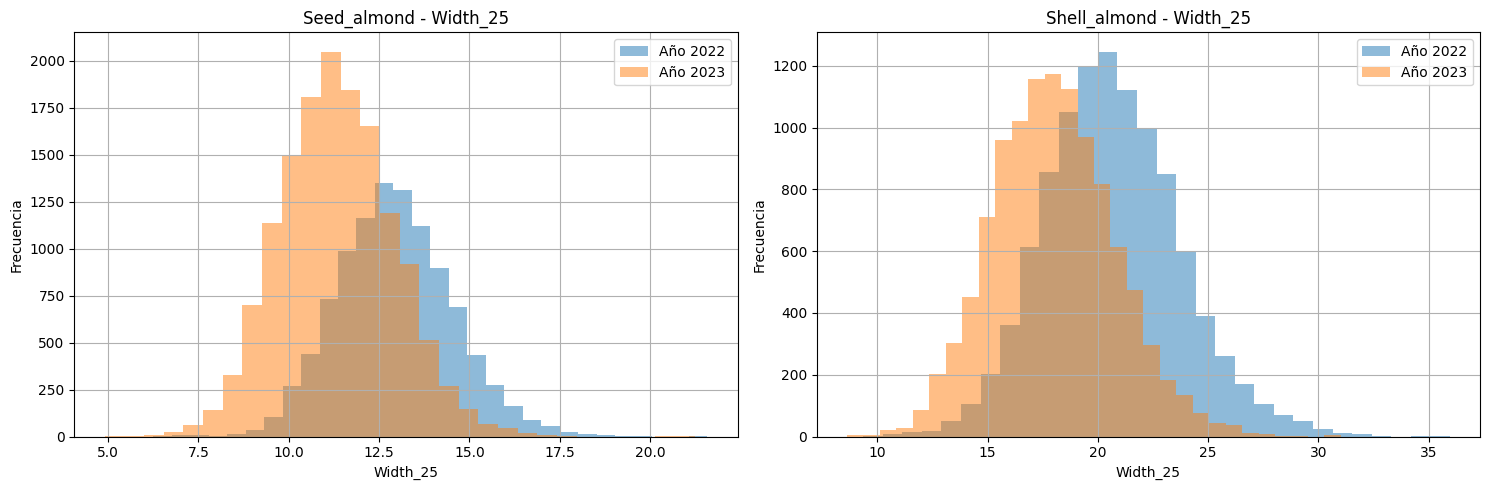

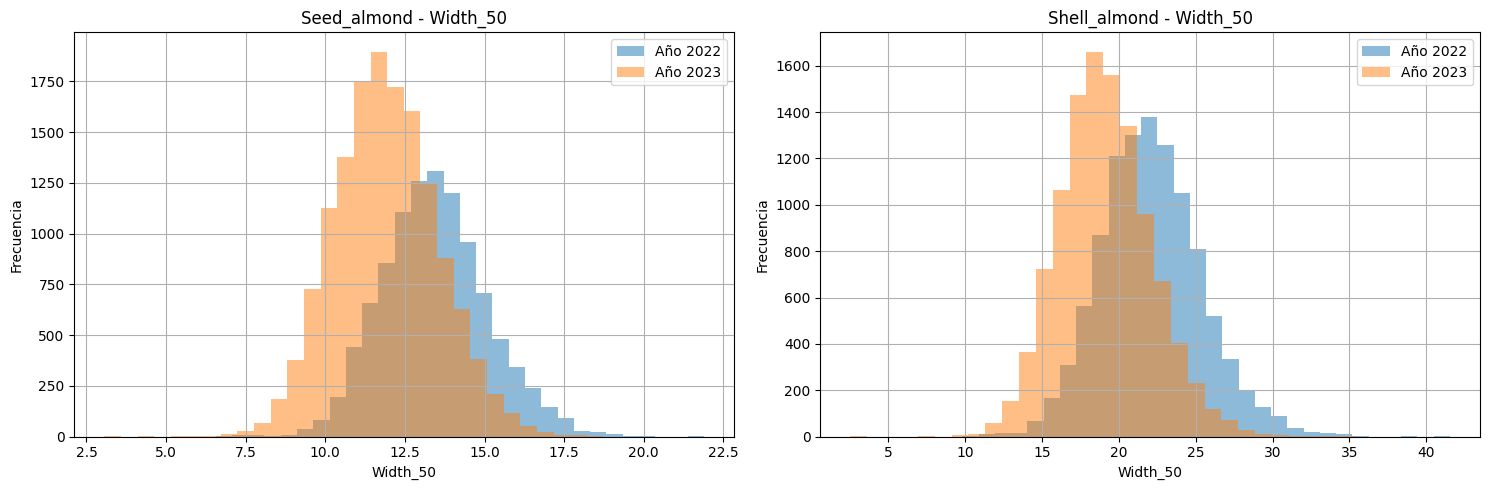

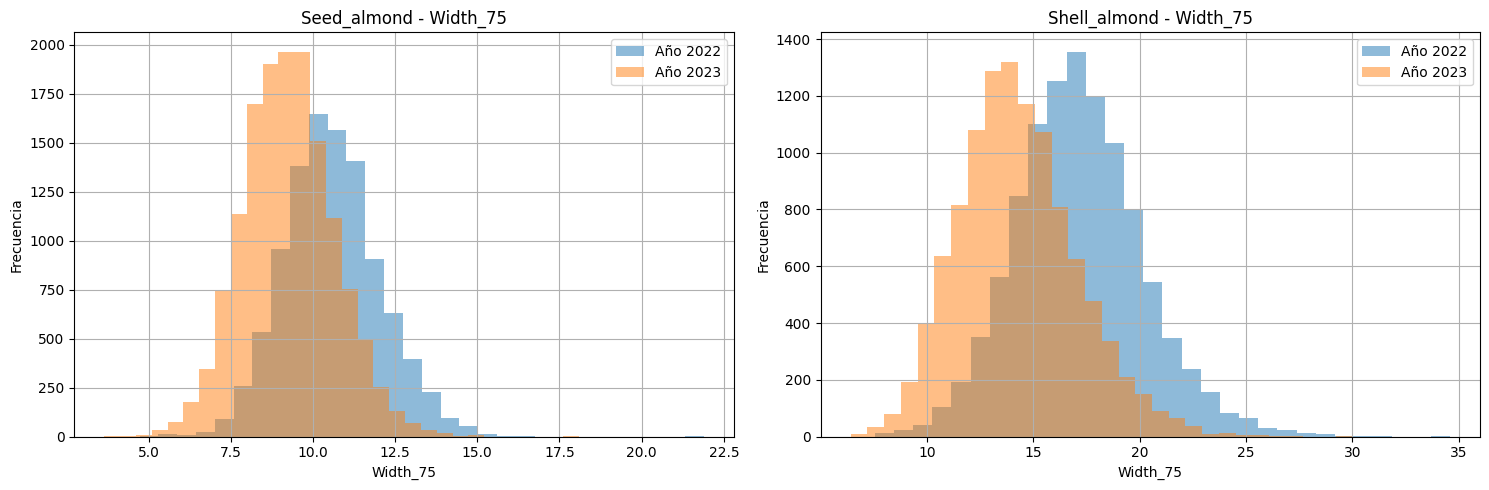

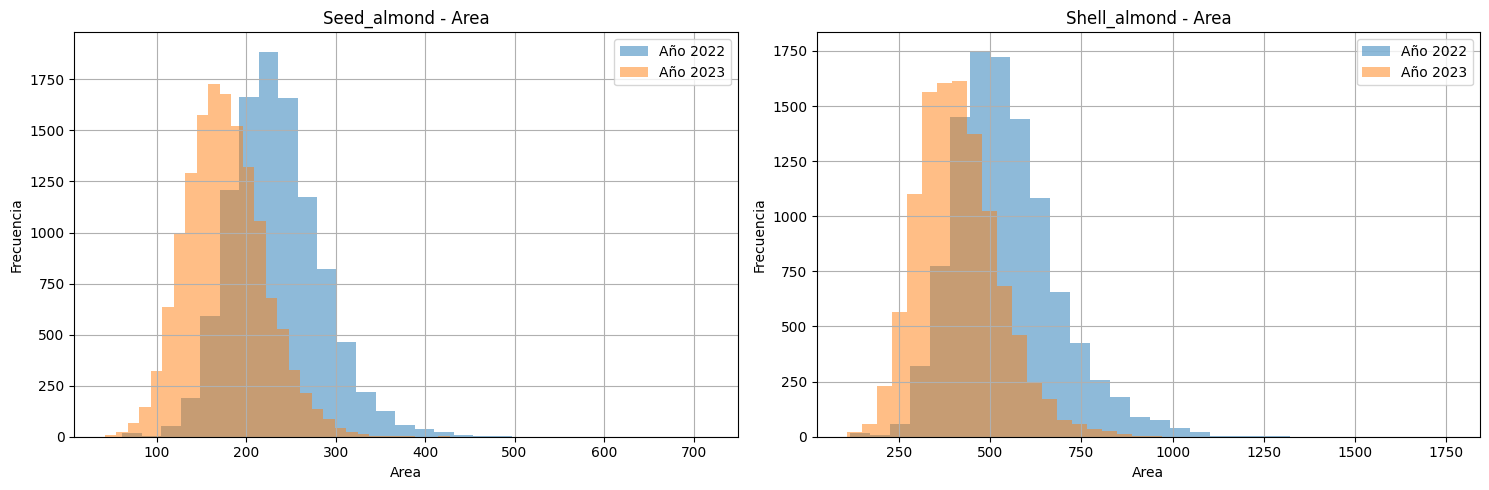

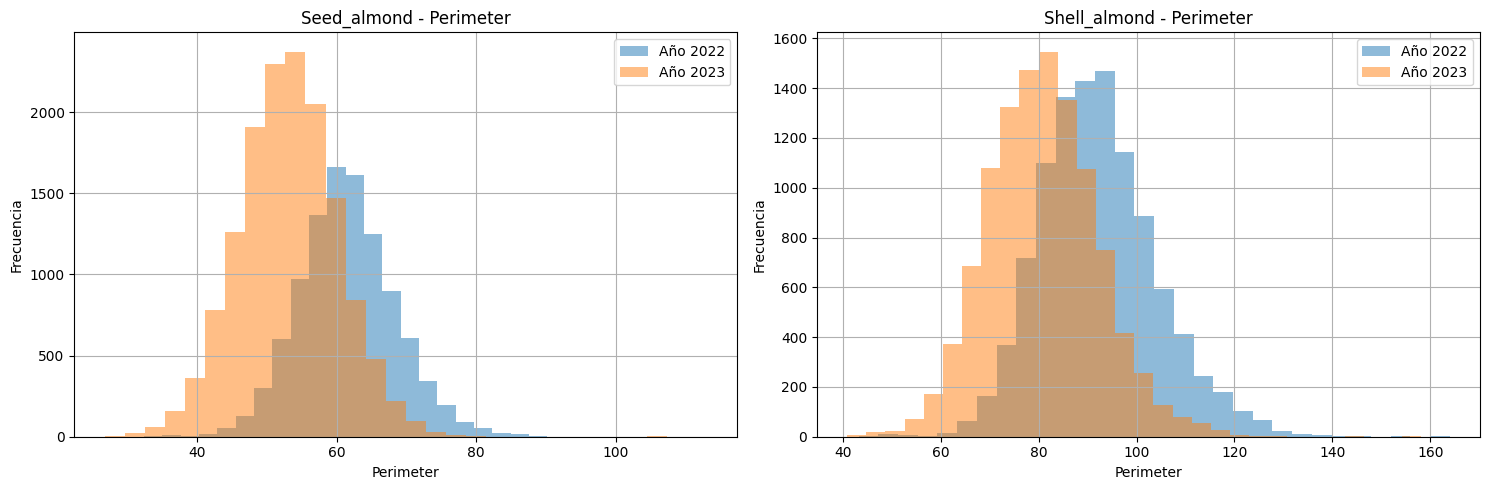

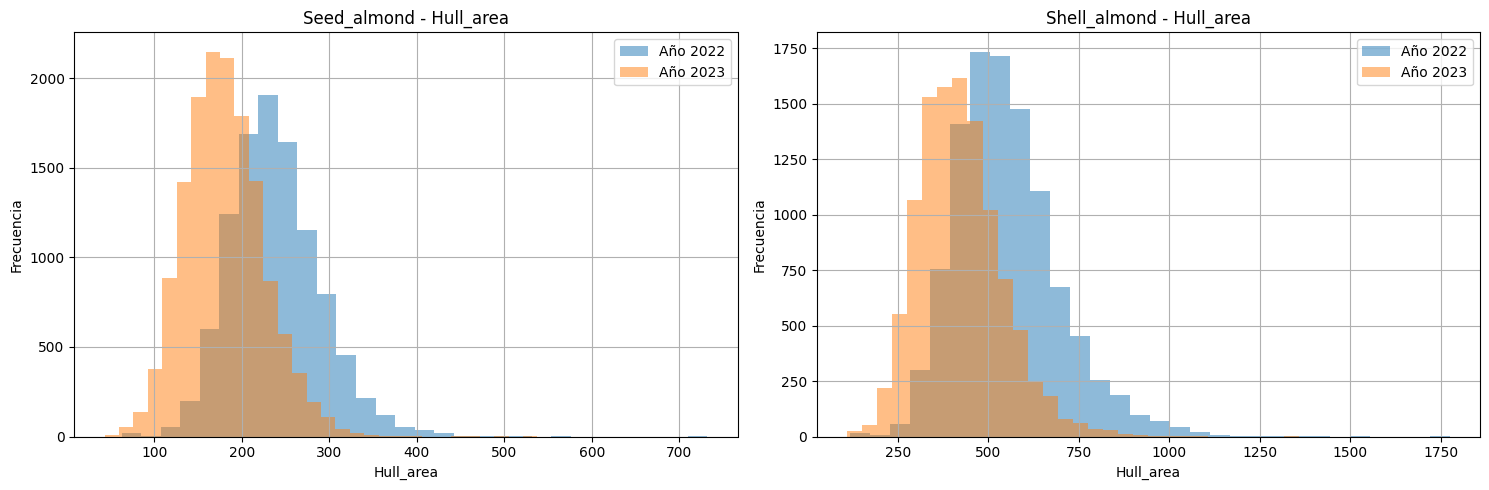

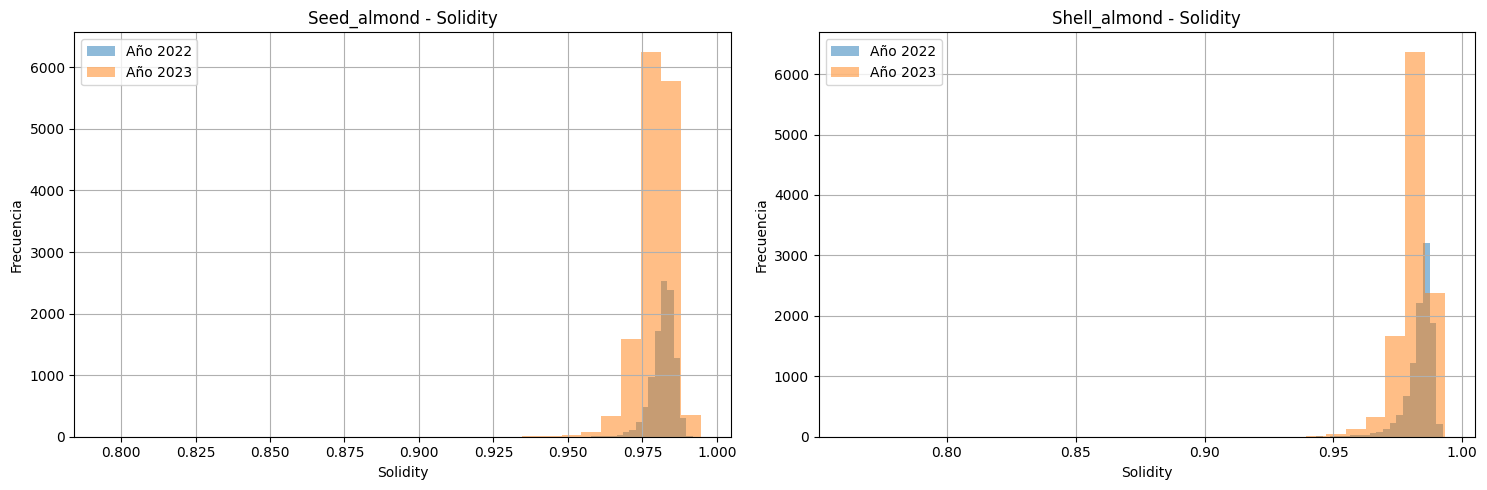

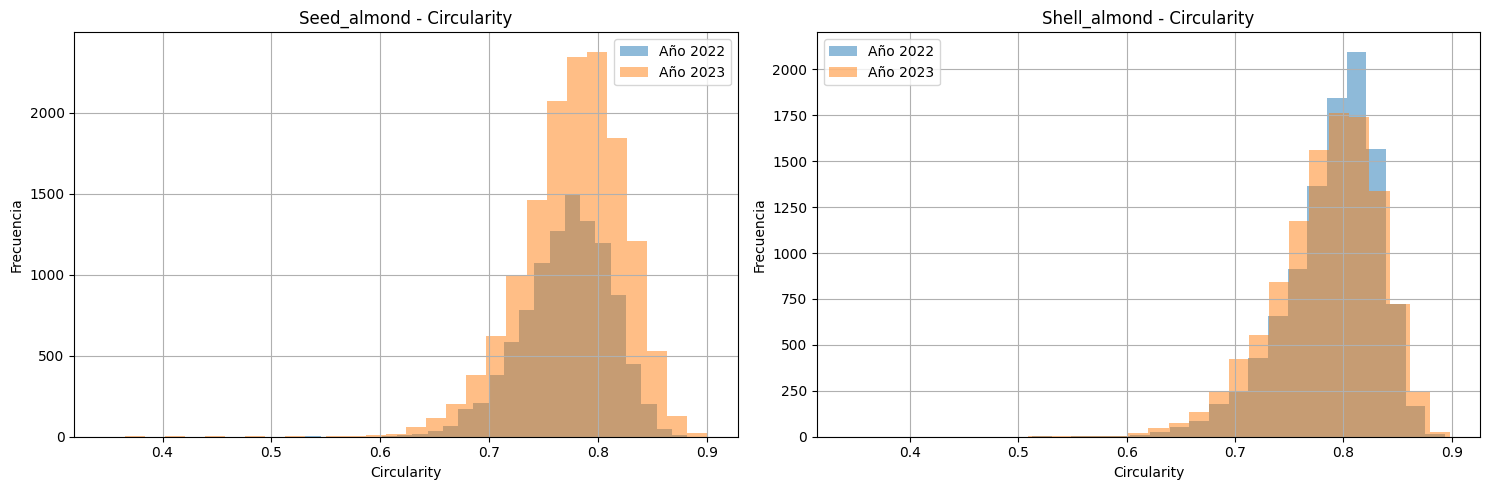

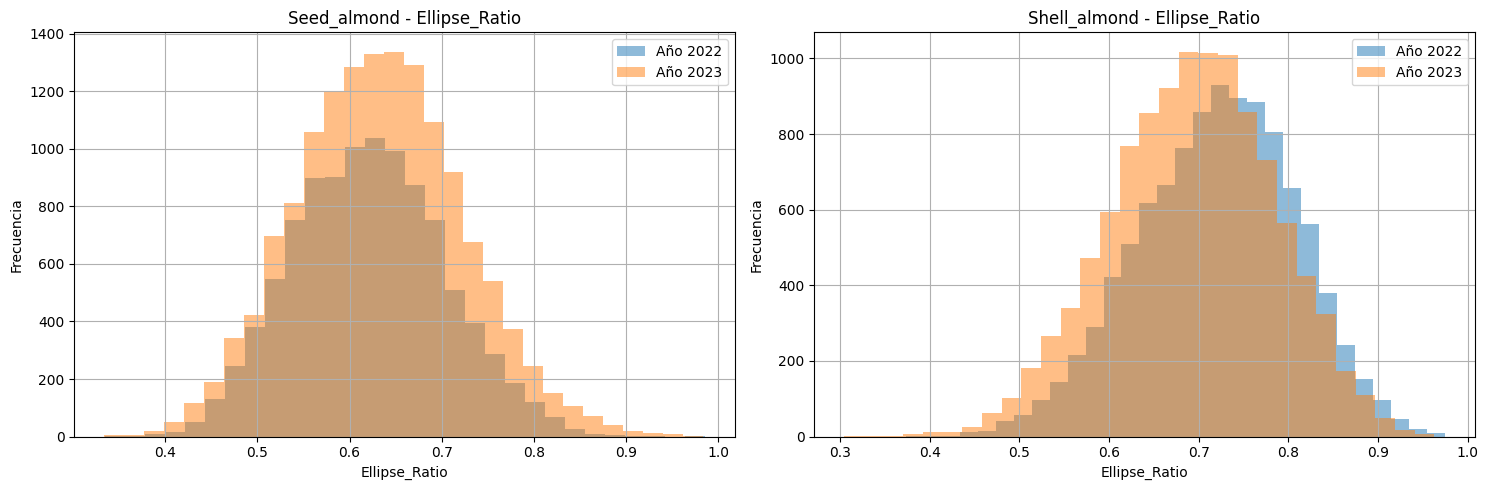

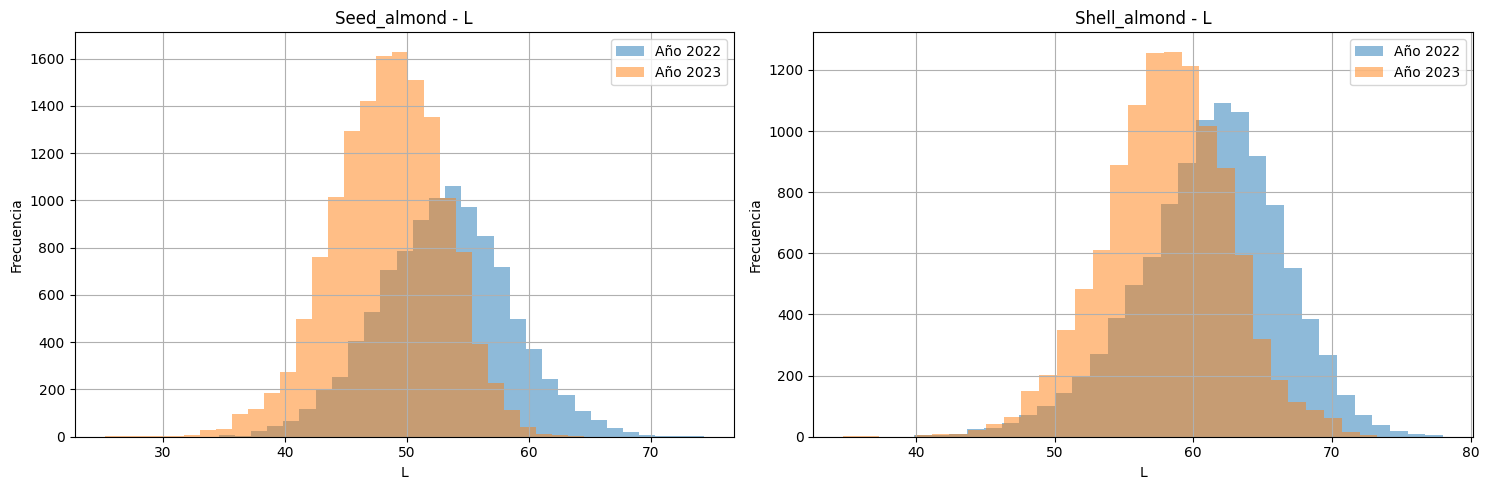

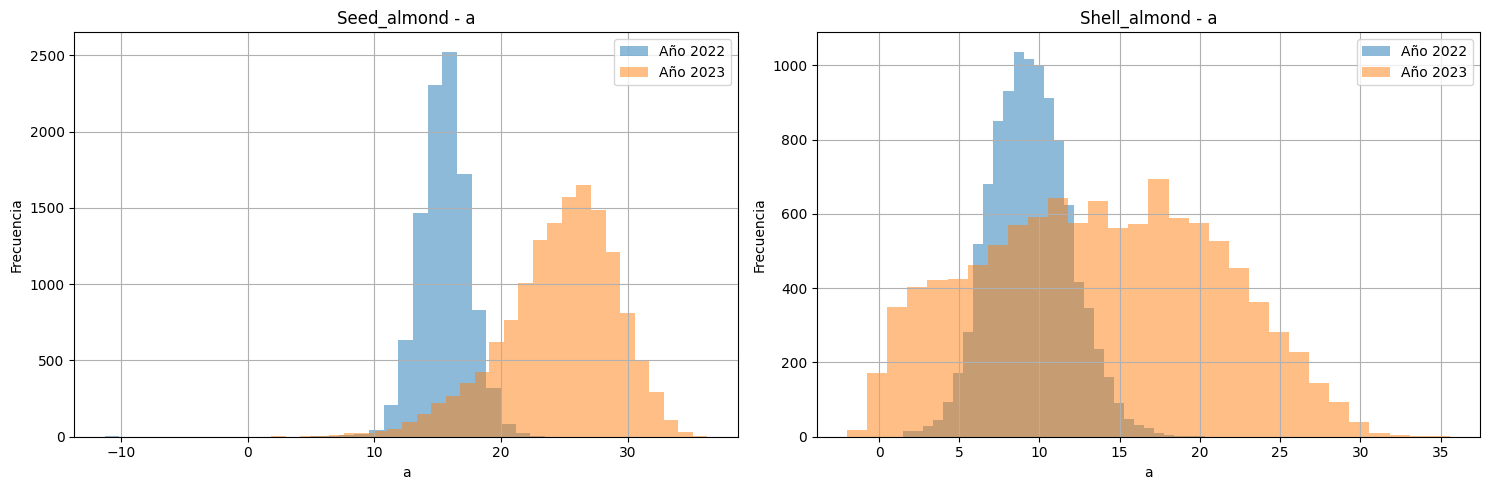

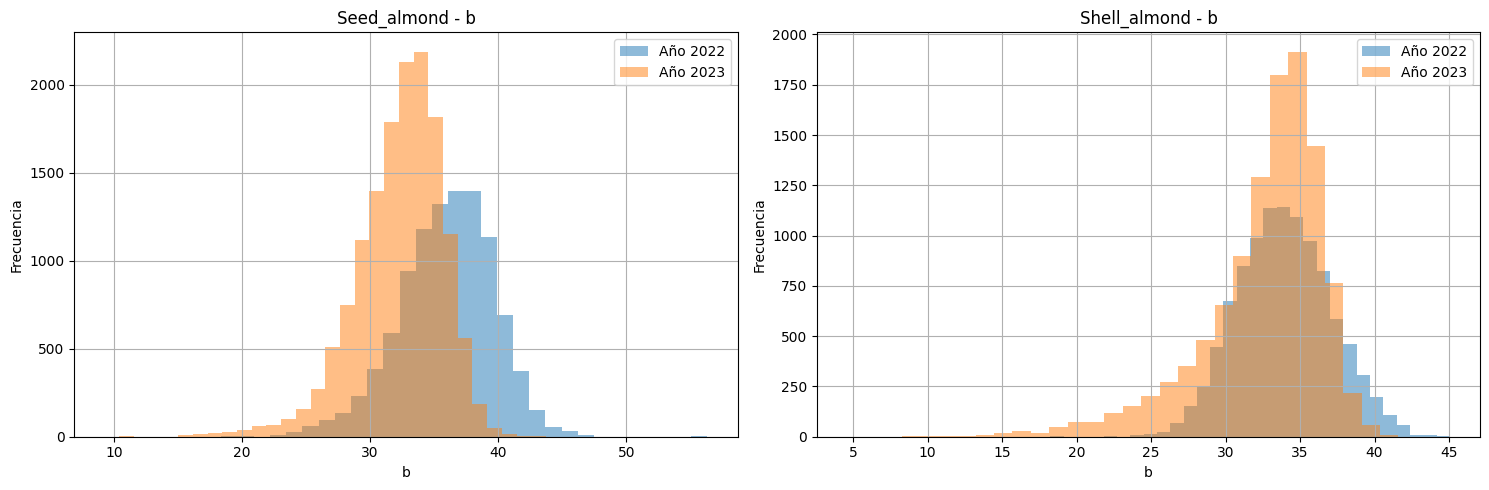

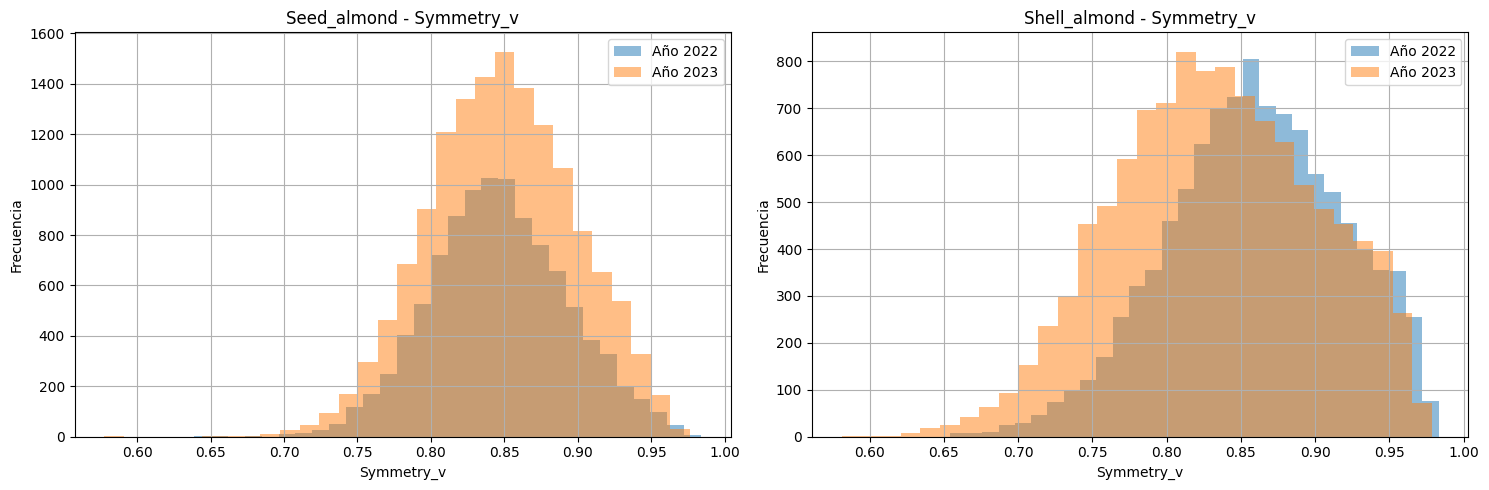

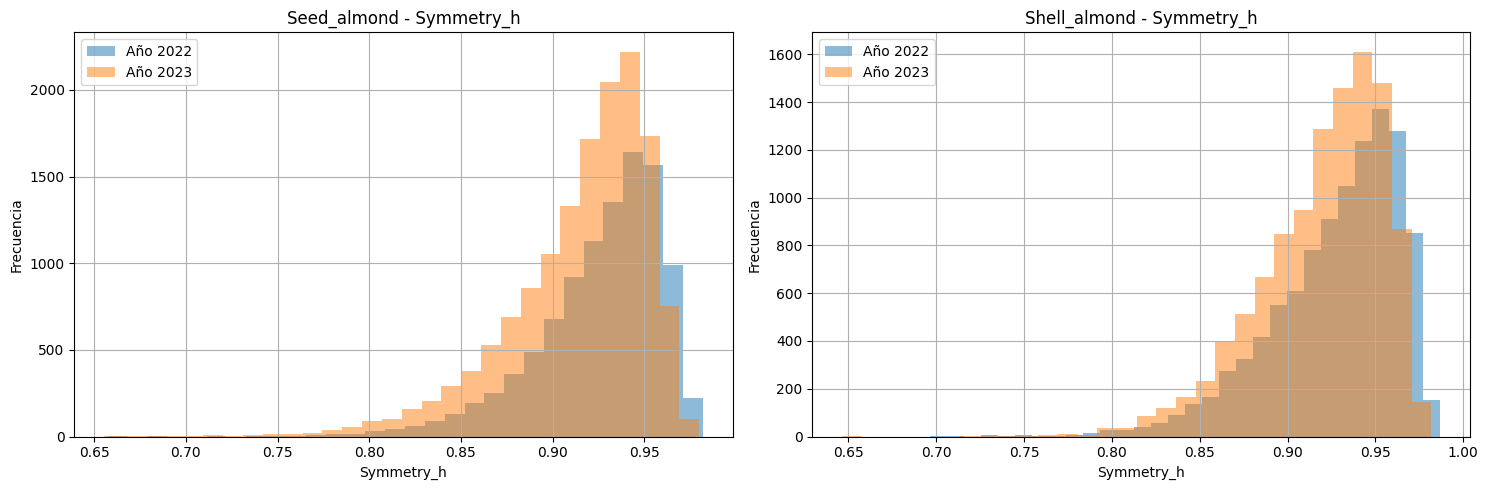

In [4]:

import matplotlib.pyplot as plt

# Ruta de la carpeta donde están los archivos .txt
carpeta = 'ruta/a/tu/carpeta'


# Variables para las que se generarán histogramas
variables = [
    'Length', 'Width', 'Width_25', 'Width_50', 'Width_75', 'Area', 'Perimeter', 
    'Hull_area', 'Solidity', 'Circularity', 'Ellipse_Ratio', 'L', 'a', 'b', 
    'Symmetry_v', 'Symmetry_h'
]

# Generar histogramas para cada variable separado por Year y Fruit_name
df_combinado['Fruit_name'] = df_combinado['Fruit_name'].astype(str)  # Asegurarse de que la columna Fruit_name es string

for variable in variables:
    if variable in df_combinado.columns:
        unique_fruits = df_combinado['Fruit_name'].unique()
        n_fruits = len(unique_fruits)
        rows = (n_fruits // 2) + (n_fruits % 2)  # Determinar el número de filas para el grid

        fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
        axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

        for i, fruit in enumerate(unique_fruits):
            ax = axes[i]
            subset_fruit = df_combinado[df_combinado['Fruit_name'] == fruit]

            for year in subset_fruit['Year'].unique():
                subset_year = subset_fruit[subset_fruit['Year'] == year]
                ax.hist(subset_year[variable], bins=30, alpha=0.5, label=f'Año {year}')

            ax.set_title(f'{fruit} - {variable}')
            ax.set_xlabel(variable)
            ax.set_ylabel('Frecuencia')
            ax.legend()
            ax.grid(True)

        # Si hay menos gráficos que ejes, ocultar los ejes sobrantes
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()


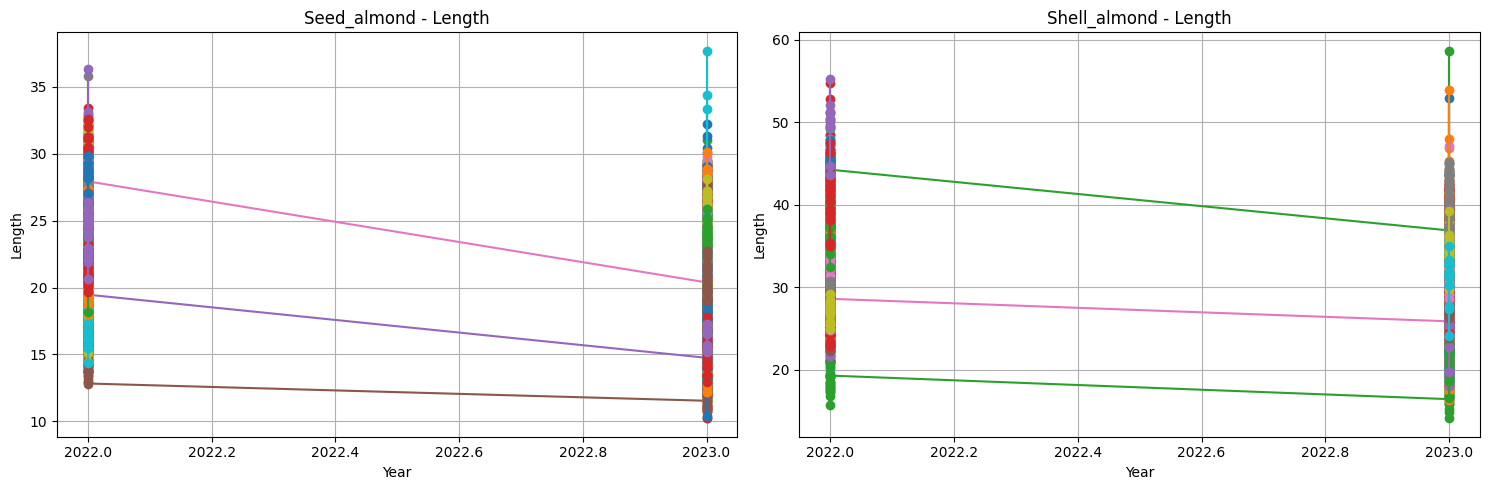

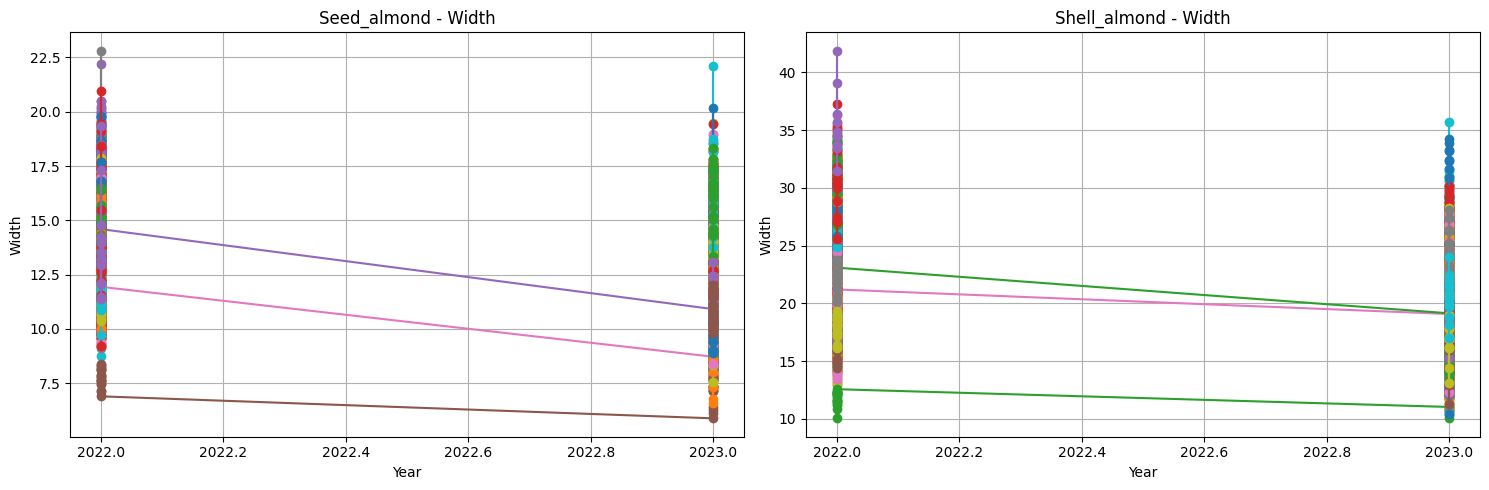

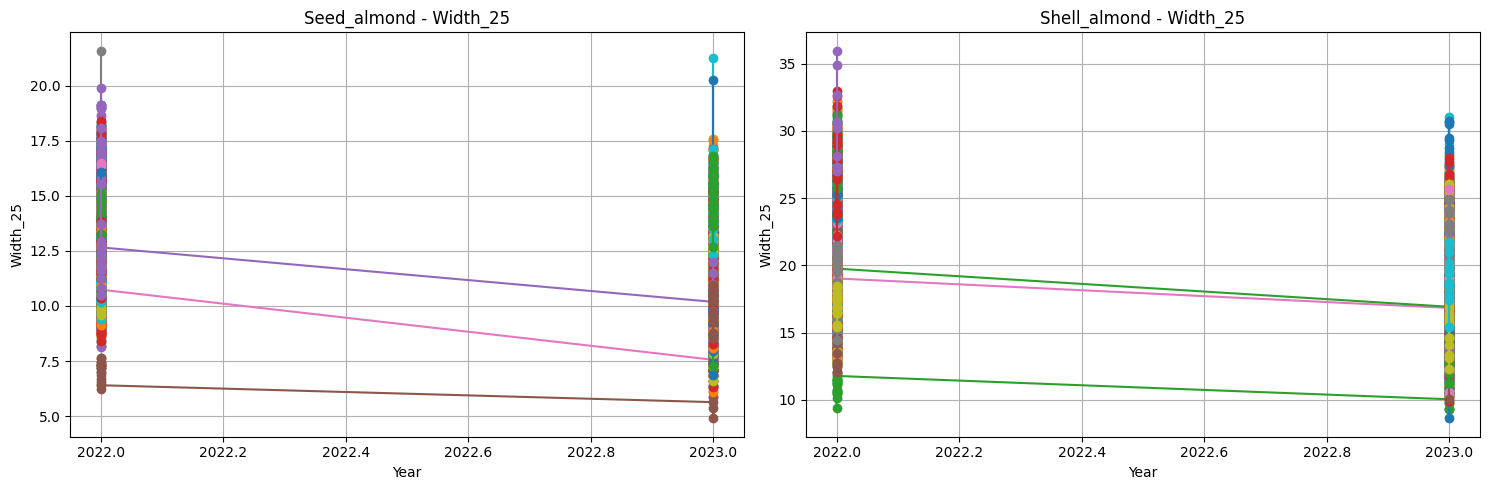

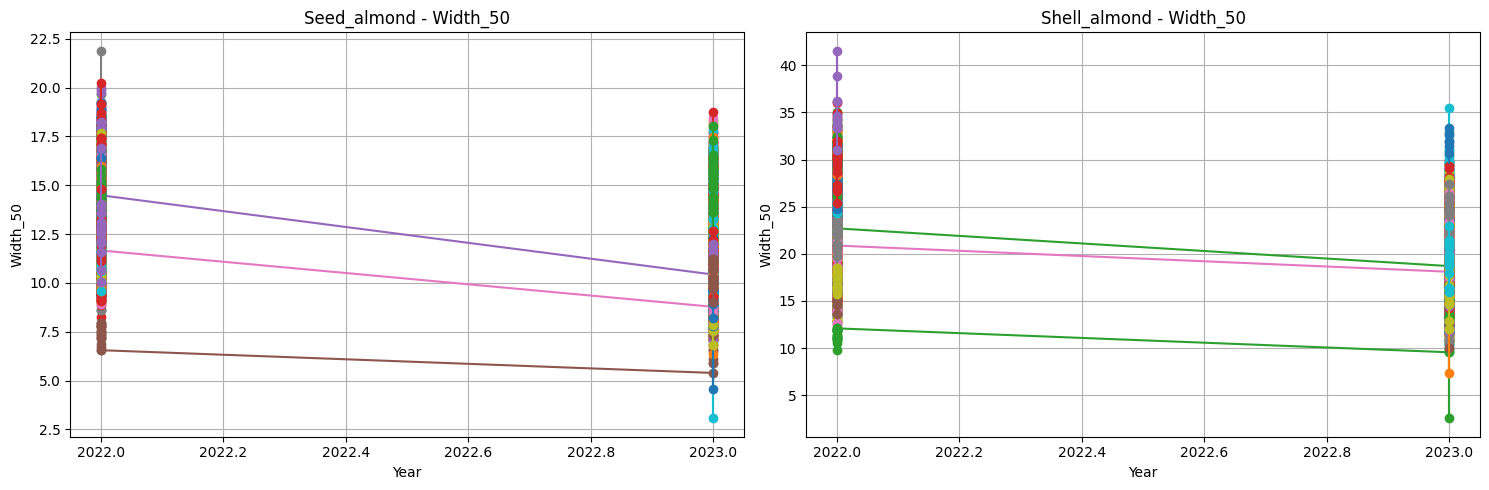

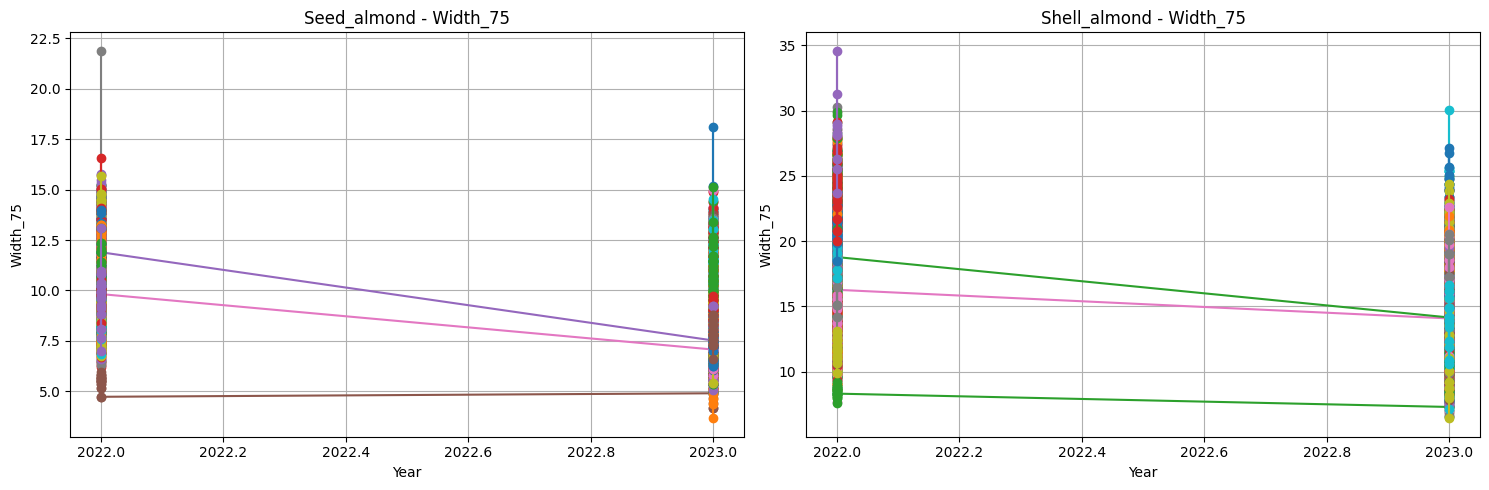

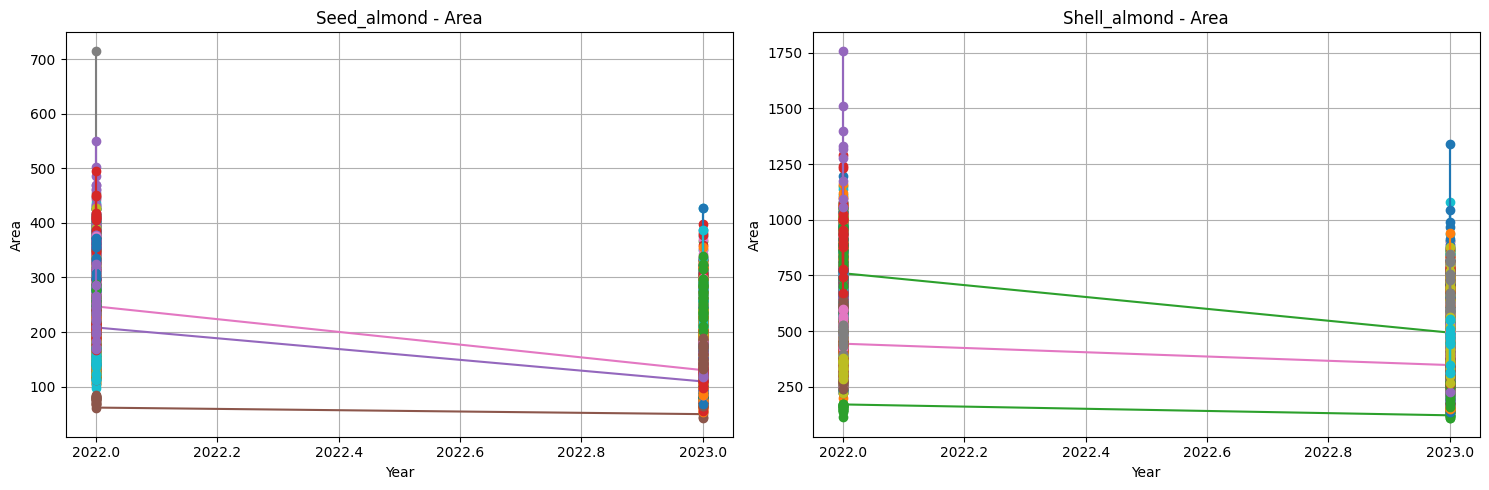

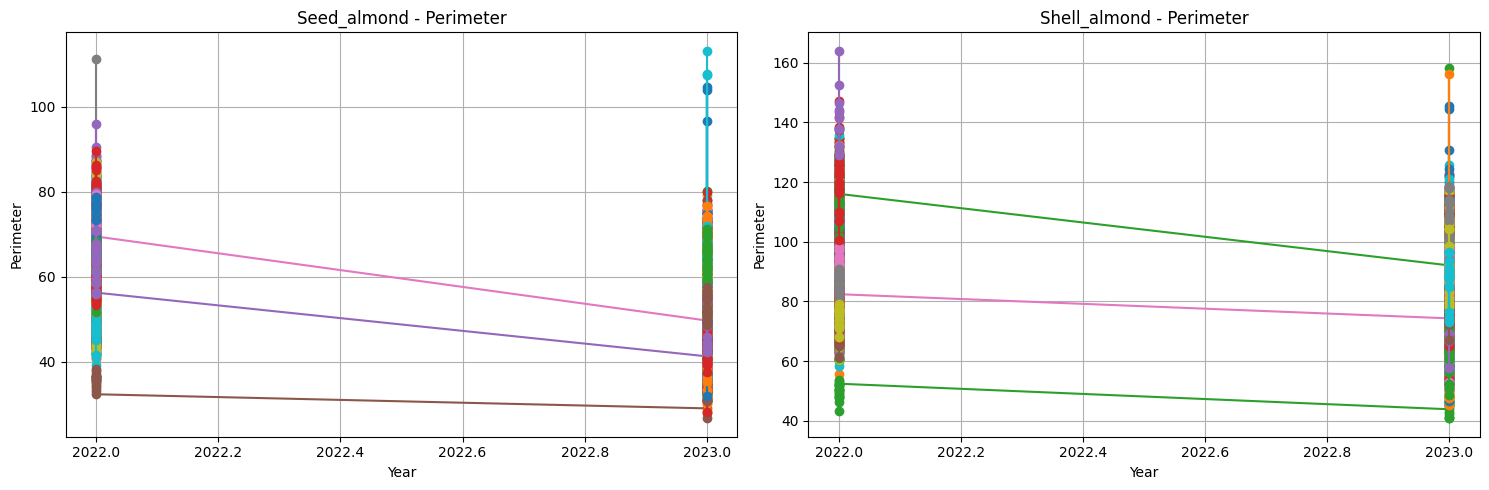

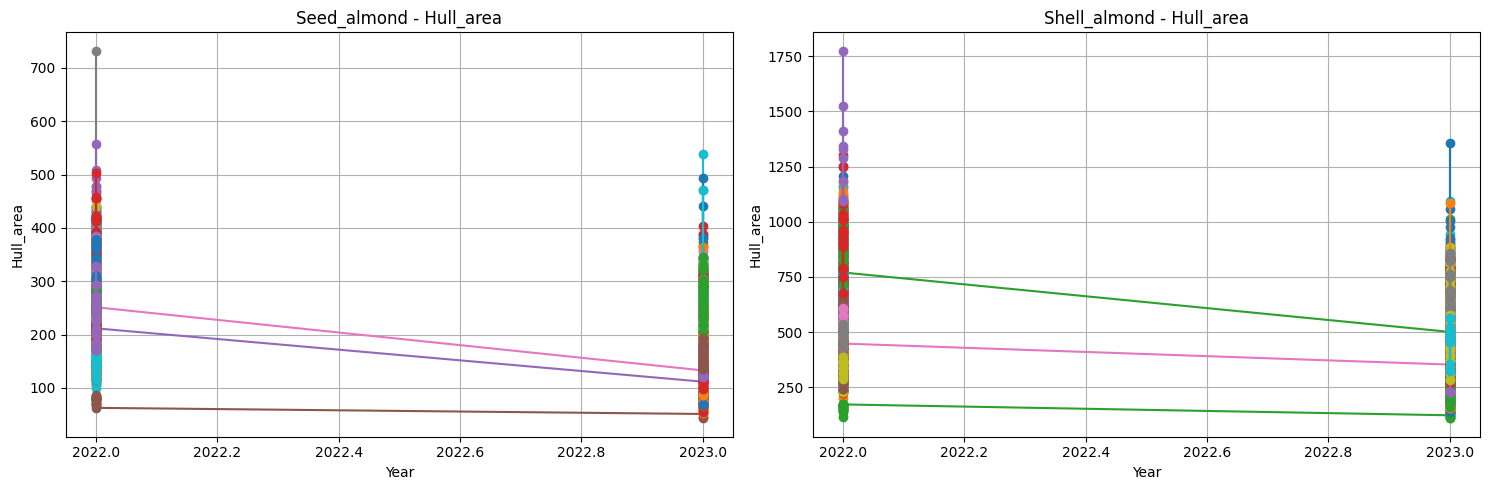

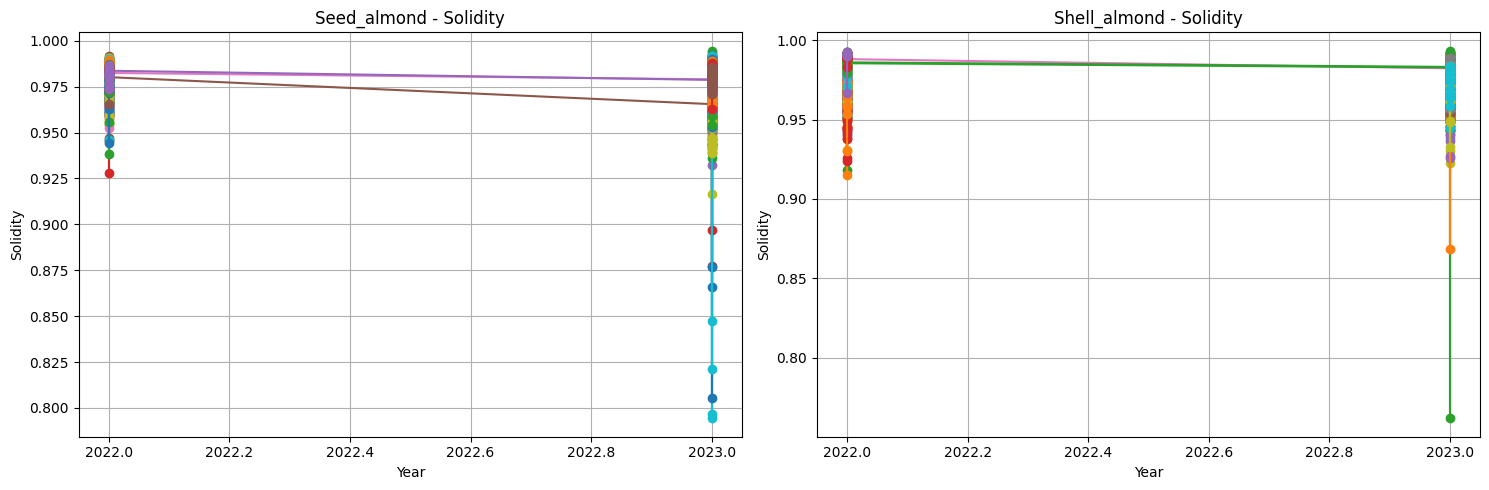

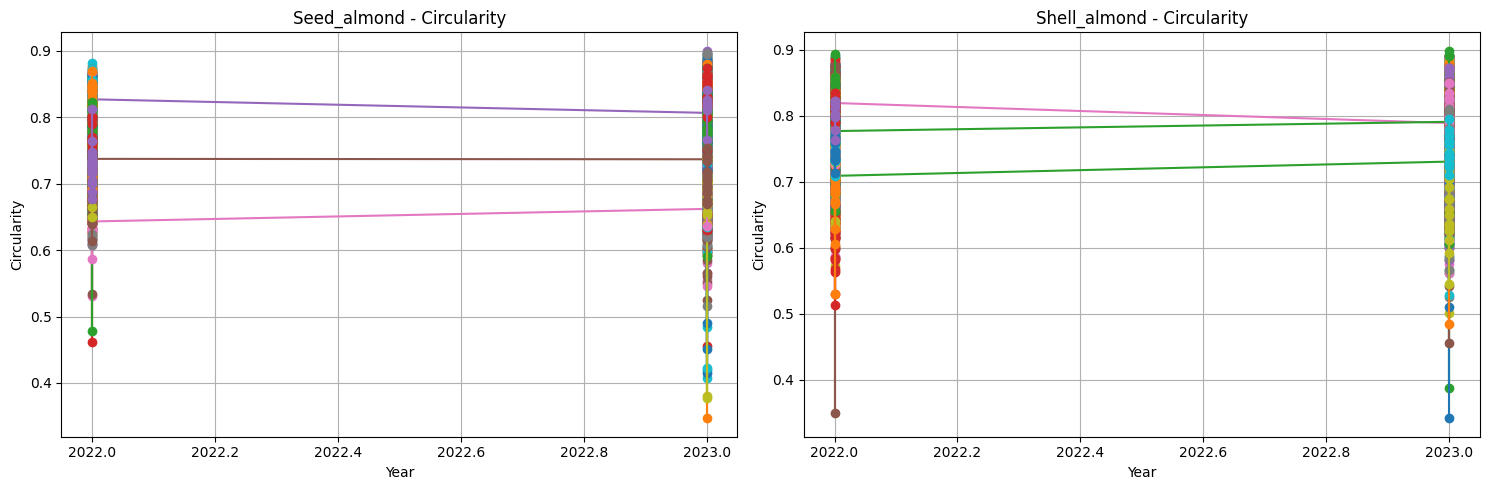

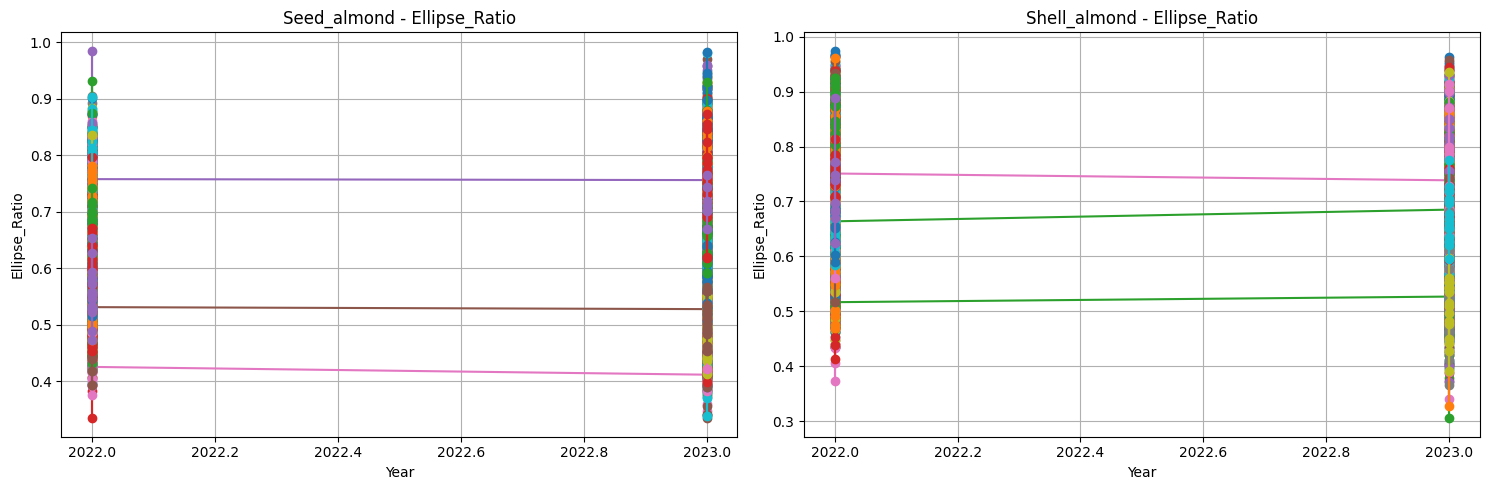

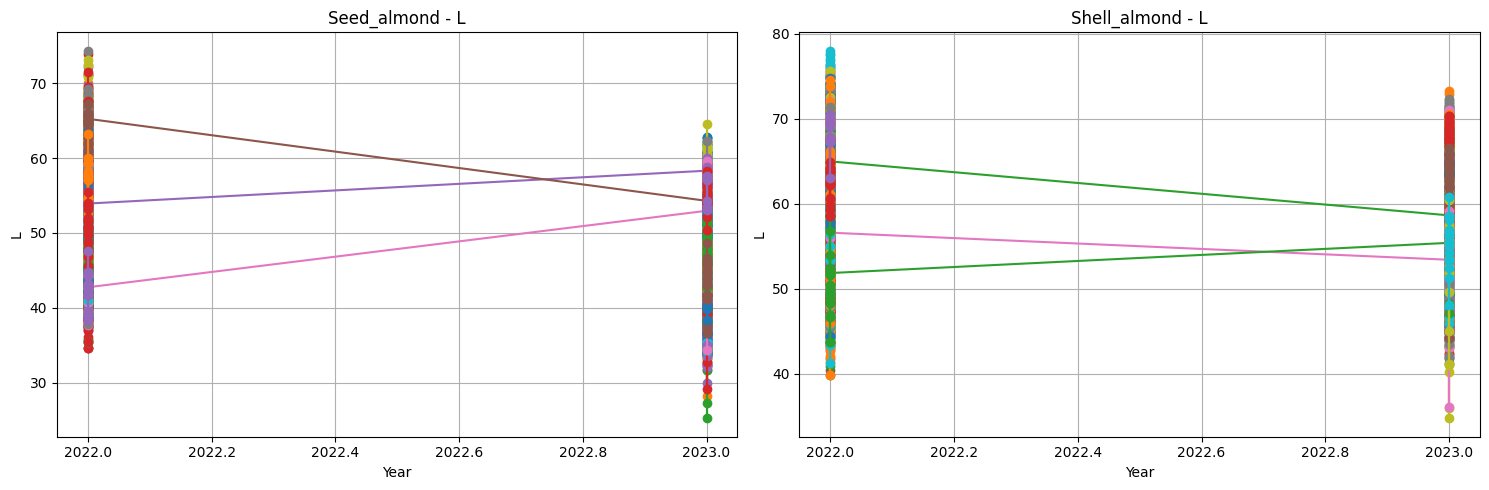

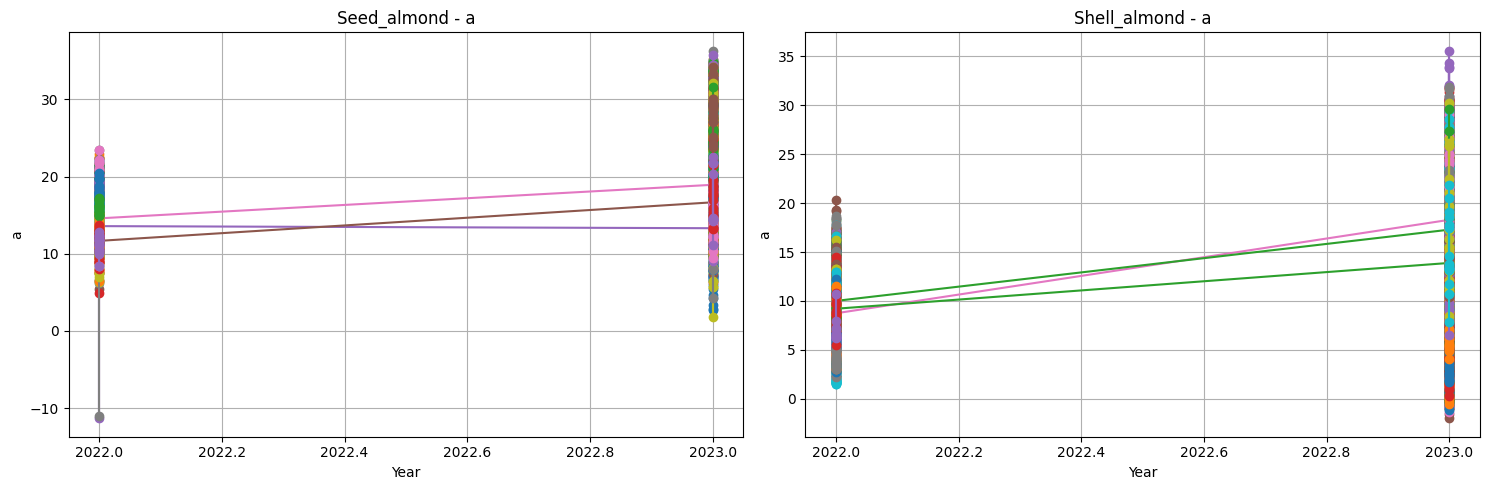

KeyboardInterrupt: 

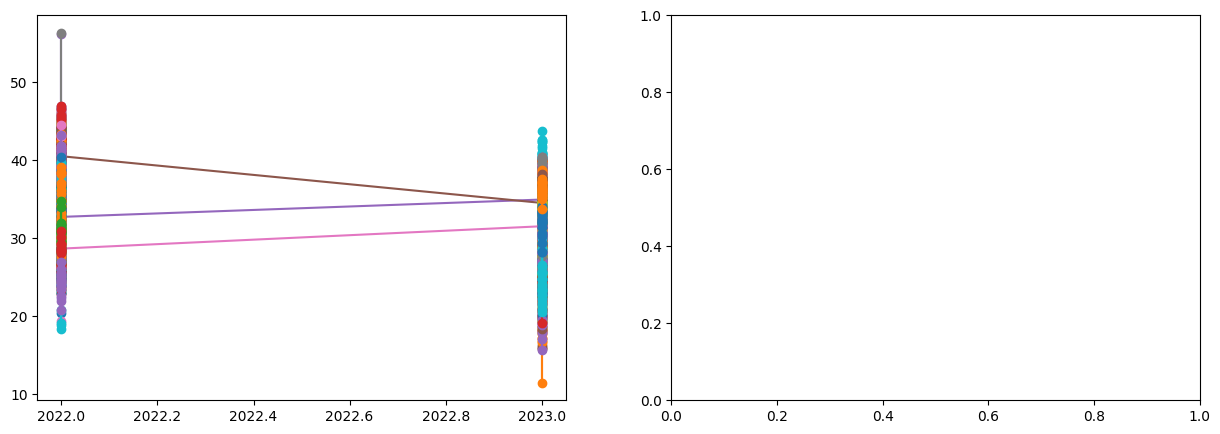

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que las columnas necesarias estén en el DataFrame
if 'ID' in df_combinado.columns and 'Year' in df_combinado.columns and 'Fruit_name' in df_combinado.columns:
    
    # Variables para las que se generarán gráficos de líneas
    variables = [
        'Length', 'Width', 'Width_25', 'Width_50', 'Width_75', 'Area', 'Perimeter', 
        'Hull_area', 'Solidity', 'Circularity', 'Ellipse_Ratio', 'L', 'a', 'b', 
        'Symmetry_v', 'Symmetry_h'
    ]

    # Iterar por cada variable
    for variable in variables:
        if variable in df_combinado.columns:
            unique_fruits = df_combinado['Fruit_name'].unique()
            n_fruits = len(unique_fruits)
            rows = (n_fruits // 2) + (n_fruits % 2)  # Determinar el número de filas para el grid

            fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
            axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

            for i, fruit in enumerate(unique_fruits):
                ax = axes[i]
                subset_fruit = df_combinado[df_combinado['Fruit_name'] == fruit]

                for id_value in subset_fruit['ID'].unique():
                    subset_id = subset_fruit[subset_fruit['ID'] == id_value]
                    ax.plot(
                        subset_id['Year'], subset_id[variable], marker='o'
                    )

                ax.set_title(f'{fruit} - {variable}')
                ax.set_xlabel('Year')
                ax.set_ylabel(variable)
                ax.grid(True)

            # Si hay menos gráficos que ejes, ocultar los ejes sobrantes
            for j in range(i + 1, len(axes)):
                axes[j].set_visible(False)

            plt.tight_layout()
            plt.show()


In [7]:

# Opcional: guardar el DataFrame combinado en un archivo
df_combinado.to_csv('archivo_combinado.csv', index=False)